# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 25.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Dataset obtained from KMPG Virtual Internship. the purpose of this project for analysing their existing customer dataset to determine customer trends and behaviour. We will use three datasets (Customer demographics, customer addresses and transactions) as a labeled dataset to to recommend which of 1000 new customers should be targeted to drive the most value for the organization.

# **Importing Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final (1).xlsx


# **Exploring Table of Transactions**

In [ ]:
Tc=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')
Tc.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
Tc.shape

(20000, 13)

In [ ]:
Tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
Tc.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [ ]:
dup = Tc.duplicated()
Tc[dup].sum()

<ipython-input-8-25e25ec1babb>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Tc[dup].sum()


transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [ ]:
Tc['profit'] = Tc['list_price'] - Tc['standard_cost']

**Exploring Columns**

In [ ]:
Tc.select_dtypes(['object']).columns

Index(['order_status', 'brand', 'product_line', 'product_class',
       'product_size'],
      dtype='object')

In [ ]:
Tc['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [ ]:
Tc['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [ ]:
Tc['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [ ]:
Tc['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [ ]:
Tc['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

# **Exploring Table of newCustomerList**

In [ ]:
Nc=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')
Nc.head()

<ipython-input-16-99c20b934d50>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Nc=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.80,1.0000,1.2500,1.0625,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.7600,0.9500,0.8075,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.53,0.5300,0.5300,0.5300,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.59,0.7375,0.7375,0.7375,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.65,0.6500,0.8125,0.8125,4,4,1.703125


In [ ]:
Nc.shape

(1000, 23)

In [ ]:
Nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
# Drop Unnamed Column
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
Nc = Nc.drop(cols, axis=1)

In [ ]:
Nc.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [ ]:
Nc.duplicated().any()

False

**Exploring** **Columns**

In [ ]:
Nc.select_dtypes(['object']).columns

Index(['first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'address', 'state', 'country'],
      dtype='object')

In [ ]:
Nc['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [ ]:
#replace U to undefined
Nc['gender']=Nc['gender'].str.replace('U','Undefined')

In [ ]:
Nc['gender'].value_counts()

Female       513
Male         470
Undefined     17
Name: gender, dtype: int64

In [ ]:
Nc['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [ ]:
Nc['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [ ]:
Nc['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [ ]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

Nc['age'] = Nc['DOB'].apply(calculate_age)

In [ ]:
Nc.drop(Nc.loc[Nc['age'] > 100].index, inplace=True)

In [ ]:
Nc['age_group'] = np.where((Nc['age']>=20)&(Nc['age']<30), '20-30',
              np.where((Nc['age']>=30)&(Nc['age']<40), '30-40',
              np.where((Nc['age']>=40)&(Nc['age']<50), '40-50',
              np.where((Nc['age']>=50)&(Nc['age']<60), '50-60',
              np.where((Nc['age']>=60)&(Nc['age']<70), '60-70','Older than 70')))))

# **Exploring table of CustomerDemographic**

In [ ]:
Custd=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')
Custd.head()

<ipython-input-34-f6ff3aa46451>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Custd=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
Custd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
Custd.duplicated().any()

False

In [ ]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
Custd['age'] = Custd['DOB'].apply(calculate_age)
Custd['age'].head()

0    69.0
1    42.0
2    68.0
3    61.0
4    45.0
Name: age, dtype: float64

In [ ]:
#dropping ages>100
Custd.drop(Custd.loc[Custd['age'] > 100].index, inplace=True)

In [ ]:
Custd['age_group'] = np.where((Custd['age']>=20)&(Custd['age']<30), '20-30',
              np.where((Custd['age']>=30)&(Custd['age']<40), '30-40',
              np.where((Custd['age']>=40)&(Custd['age']<50), '40-50',
              np.where((Custd['age']>=50)&(Custd['age']<60), '50-60',
              np.where((Custd['age']>=60)&(Custd['age']<70), '60-70','Older than 70')))))

In [ ]:
Custd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,60-70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68.0,60-70
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61.0,60-70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0,40-50


**Exploring columns**

In [ ]:
Custd.select_dtypes(['object']).columns

Index(['first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'age_group'],
      dtype='object')

In [ ]:
Custd['gender'].value_counts()

Female    2037
Male      1872
U           87
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [ ]:
Custd['gender'] = Custd['gender'].replace('U','Undefined').replace('F','Female').replace('Femal','Female').replace('M','Male')

In [ ]:
Custd['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     978
Name: wealth_segment, dtype: int64

In [ ]:
Custd['deceased_indicator'].value_counts()

N    3997
Y       2
Name: deceased_indicator, dtype: int64

In [ ]:
Custd['default'].value_counts(10)

100                                       0.030557
1                                         0.030287
-1                                        0.030016
-100                                      0.026771
Ù¡Ù¢Ù£                                    0.014332
                                            ...   
testâ testâ«                              0.008383
/dev/null; touch /tmp/blns.fail ; echo    0.008112
âªâªtestâª                                0.007842
ì¸ëë°í ë¥´                                0.007301
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ          0.006760
Name: default, Length: 90, dtype: float64

In [ ]:
Custd = Custd.drop('default', axis=1)

In [ ]:
Custd['owns_car'].value_counts()

Yes    2024
No     1975
Name: owns_car, dtype: int64

# **Exploring table of CustomerAddress**

In [ ]:
cus_add=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')
cus_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
cus_add['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [ ]:
cus_add['state'] = cus_add['state'].replace('Victoria','VIC').replace('New South Wales','NSW')

# **Merging Table**

Merging CustomerDemographi,CustomerAddress and Transaction. we have to combine these tables for analysis.



In [ ]:
custd = pd.merge(Custd, cus_add, how='inner', on='customer_id')
custd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60-70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40-50,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60-70,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,45.0,40-50,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,56.0,50-60,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
df = pd.merge(custd, Tc, how='inner', on='customer_id')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87


# **Data Exploration and Interpretation**



We will see old customer trends & behaviour and new customer trends & behaviour.

*   Age distribution
*   Customer State
*   Job industry category
*   Bike related purchases over the last past 3 years by gender
*   Wealth segment by gender
*   Owns car by State





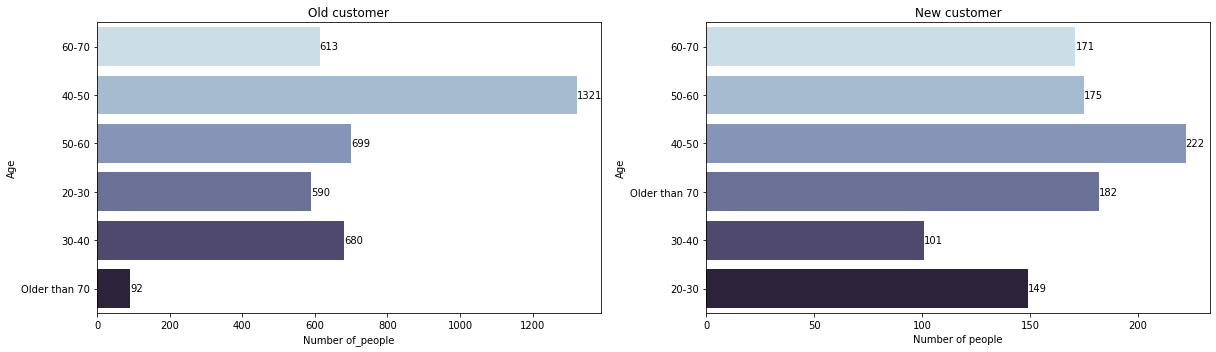

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(17, 5))
a=sns.countplot(data=custd, y='age_group', palette='ch:s=.25,rot=-.25', ax=axs[0])
a.set_title('Old customer')
a.set_xlabel('Number of_people')
a.set_ylabel('Age')
for i in a.containers:
    a.bar_label(i,)

b=sns.countplot(data=Nc, y='age_group', palette='ch:s=.25,rot=-.25', ax=axs[1])
b.set_title('New customer')
b.set_ylabel('Age')
b.set_xlabel('Number of people')
for i in b.containers:
    b.bar_label(i,)
f.tight_layout()

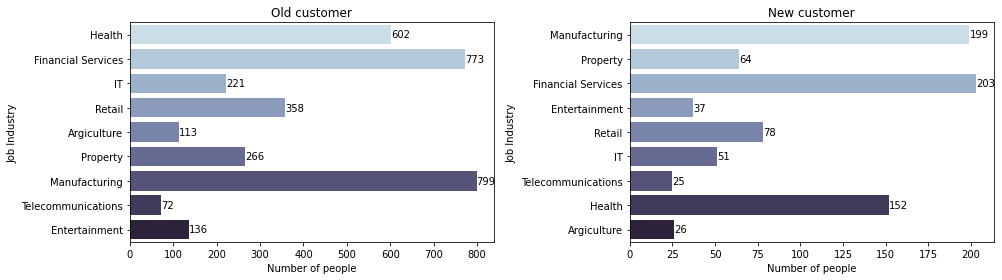

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(14, 4))
a=sns.countplot(data=custd, y='job_industry_category', palette='ch:s=.25,rot=-.25', ax=axs[0])
a.set_title('Old customer')
a.set_ylabel('Job Industry')
a.set_xlabel('Number of people')
for i in a.containers:
    a.bar_label(i,)

b=sns.countplot(data=Nc, y='job_industry_category', palette='ch:s=.25,rot=-.25', ax=axs[1])
b.set_title('New customer')
b.set_xlabel('Number of people')
b.set_ylabel('Job Industry')
f.tight_layout()
for i in b.containers:
    b.bar_label(i,)

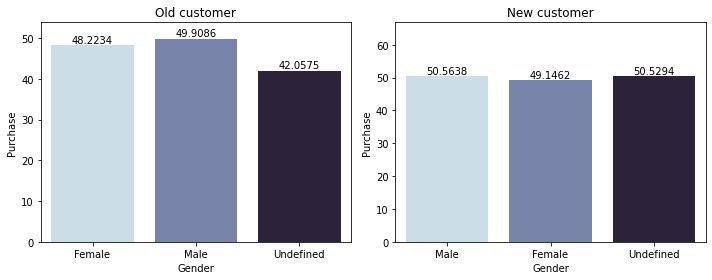

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 4))
a=sns.barplot(data=custd, x='gender', y='past_3_years_bike_related_purchases', palette='ch:s=.25,rot=-.25', ax=axs[0], errwidth=0)
a.set_title('Old customer')
a.set_xlabel('Gender')
a.set_ylabel('Purchase')
for i in a.containers:
    a.bar_label(i,)

b=sns.barplot(data=Nc, x='gender', y='past_3_years_bike_related_purchases', palette='ch:s=.25,rot=-.25', ax=axs[1], errwidth=0)
b.set_title('New customer')
b.set_xlabel('Gender')
b.set_ylabel('Purchase')
for i in b.containers:
    b.bar_label(i,)
f.tight_layout()

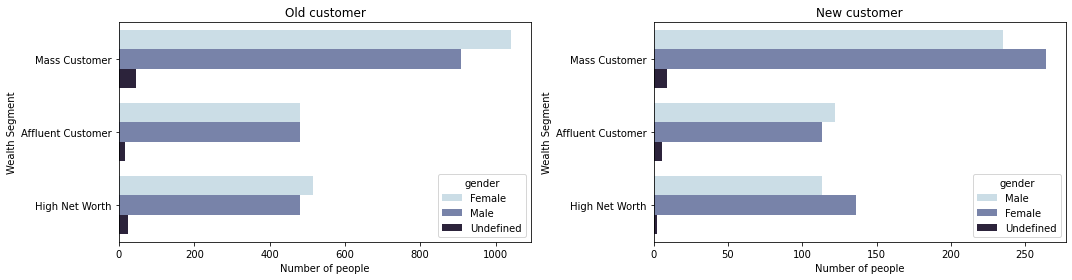

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(15, 4))
a=sns.countplot(data=custd, y='wealth_segment', hue='gender', palette='ch:s=.25,rot=-.25', ax=axs[0])
a.set_title('Old customer')
a.set_ylabel('Wealth Segment')
a.set_xlabel('Number of people')

b=sns.countplot(data=Nc, y='wealth_segment', hue='gender', palette='ch:s=.25,rot=-.25', ax=axs[1])
b.set_title('New customer')
b.set_xlabel('Number of people')
b.set_ylabel('Wealth Segment')
f.tight_layout()

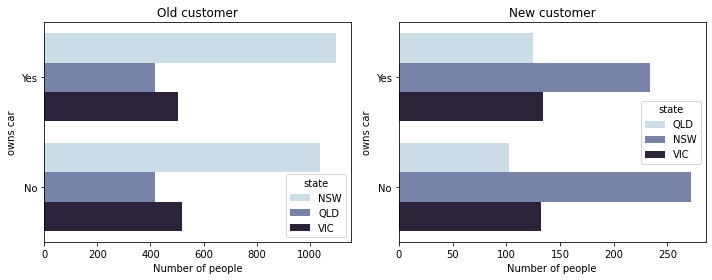

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(10, 4))
a=sns.countplot(data=custd, y='owns_car', hue='state', palette='ch:s=.25,rot=-.25', ax=axs[0])
a.set_title('Old customer')
a.set_xlabel('Number of people')
a.set_ylabel('owns car')

b=sns.countplot(data=Nc, y='owns_car', hue='state', palette='ch:s=.25,rot=-.25', ax=axs[1])
b.set_title('New customer')
b.set_xlabel('Number of people')
b.set_ylabel('owns car')
f.tight_layout()

## **Data Cleaning**

Before analyzing we will check, clean, and fill the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19327 entries, 0 to 19958
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19327 non-null  int64         
 1   first_name                           19327 non-null  object        
 2   last_name                            18705 non-null  object        
 3   gender                               19327 non-null  object        
 4   past_3_years_bike_related_purchases  19327 non-null  int64         
 5   DOB                                  19327 non-null  datetime64[ns]
 6   job_title                            19327 non-null  object        
 7   job_industry_category                19327 non-null  object        
 8   wealth_segment                       19327 non-null  object        
 9   deceased_indicator                   19327 non-null  object        
 10  owns_car  

In [ ]:
check_missing = df.isnull().sum() *100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

last_name    3.218296
dtype: float64

In [ ]:
#dropping null values from the columns
df.dropna(subset=['DOB', 'tenure', 'age','brand','product_line','product_class','product_size','standard_cost','product_first_sold_date'], inplace=True)

Fill the missing value

In [ ]:
df['job_industry_category'].fillna('Unknown', inplace=True)
df['job_title'].fillna('Other', inplace=True)
df['online_order'].fillna(df['online_order'].mode().iloc[0], inplace=True)

In [ ]:
df.shape

(19327, 32)

# **RFM Analysis**

In this project we will use RFM analysis. RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

*  Recency: How recently has the customer made a transaction with us
*  Frequency: How frequent is the customer in ordering/buying some product from us
*  Monetary: How much does the customer spend on purchasing products from us.



**Calculating** **Recency**

In [ ]:
recency_df = df.groupby(by='customer_id', as_index=False)['transaction_date'].max()
recency_df.columns = ['customer_id', 'transaction_date']
recent_date = recency_df['transaction_date'].max()
recency_df['recency'] = recency_df['transaction_date'].apply(lambda x: (recent_date - x).days)
recency_df.head()

,customer_id,transaction_date,recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,4,2017-06-18,195
3,5,2017-12-14,16
4,6,2017-10-27,64


**Calculating Frequency**

In [ ]:
frequency_df = df.drop_duplicates().groupby(by=['customer_id'], as_index=False)['transaction_id'].count()
frequency_df.columns = ['customer_id', 'frequency']
frequency_df.head()


,customer_id,frequency
0,1,11
1,2,3
2,4,2
3,5,6
4,6,5


**Calculating Monetary Value**

In [ ]:
monetary_df = df.groupby(by='customer_id', as_index=False)['profit'].sum()
monetary_df.columns = ['customer_id', 'monetary']
monetary_df.head()

,customer_id,monetary
0,1,3018.09
1,2,2226.26
2,4,220.57
3,5,2394.94
4,6,3946.55


**Merging all the dataframe columns**

In [ ]:
rf_df = recency_df.merge(frequency_df, on='customer_id')
rfm_df = rf_df.merge(monetary_df, on='customer_id').drop(columns='transaction_date')
rfm_df.head()

,customer_id,recency,frequency,monetary
0,1,7,11,3018.09
1,2,128,3,2226.26
2,4,195,2,220.57
3,5,16,6,2394.94
4,6,64,5,3946.55


**Ranking Customers based upon their recency, frequency, and monetary value**

In [ ]:
rfm_df['R'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M'] = rfm_df['monetary'].rank(ascending=True)

In [ ]:
#normalizing
rfm_df['R_rank'] = (rfm_df['R']/rfm_df['R'].max())*100
rfm_df['F_rank'] = (rfm_df['F']/rfm_df['F'].max())*100
rfm_df['M_rank'] = (rfm_df['F']/rfm_df['M'].max())*100
rfm_df.head()

,customer_id,recency,frequency,monetary,R,F,M,R_rank,F_rank,M_rank
0,1,7,11,3018.09,3055.5,3340.5,1825.0,90.146039,97.933157,97.904455
1,2,128,3,2226.26,448.5,435.0,1165.0,13.232040,12.752858,12.749121
2,4,195,2,220.57,136.5,152.5,54.0,4.027143,4.470830,4.469519
3,5,16,6,2394.94,2636.5,1987.0,1312.0,77.784334,58.252712,58.235639
4,6,64,5,3946.55,1239.5,1407.5,2447.0,36.568815,41.263559,41.251465


In [ ]:
rfm_df.drop(columns=['R', 'F', 'M'], inplace=True)
rfm_df.head()

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank
0,1,7,11,3018.09,90.146039,97.933157,97.904455
1,2,128,3,2226.26,13.232040,12.752858,12.749121
2,4,195,2,220.57,4.027143,4.470830,4.469519
3,5,16,6,2394.94,77.784334,58.252712,58.235639
4,6,64,5,3946.55,36.568815,41.263559,41.251465


**Calculating RFM score**

Rating customers on a scale of 5. Formula used for calculating rfm score is : 0.15 x Recency score + 0.28 x Frequency score + 0.57 x Monetary score.

**Customer segment:**

*  rfm score >4.5 : Top Customer

*  4.5 > rfm score > 4 : High Value Customer

*  4>rfm score >3 : Medium value customer

*  3>rfm score>1.6 : Low value customer

*  rfm score<1.6 :Lost Customer

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank'] + 0.28*rfm_df['F_rank'] + 0.57*rfm_df['M_rank']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_Score']].head(7)


,customer_id,RFM_Score
0,1,4.84
1,2,0.64
2,4,0.22
3,5,3.06
4,6,2.03
5,7,0.55
6,8,4.60


In [ ]:
rfm_df['customer_segment'] = np.where(rfm_df['RFM_Score'] > 4.5, 'Top Customers',
									          (np.where(rfm_df['RFM_Score'] > 4, 'High value Customer',
										        (np.where(rfm_df['RFM_Score'] > 3, 'Medium Value Customer',
							              np.where(rfm_df['RFM_Score'] > 1.6,	'Low Value Customers', 'Lost Customers'))))))

In [ ]:
rfm_df.head()

,customer_id,recency,frequency,monetary,R_rank,F_rank,M_rank,RFM_Score,customer_segment
0,1,7,11,3018.09,90.15,97.93,97.90,4.84,Top Customers
1,2,128,3,2226.26,13.23,12.75,12.75,0.64,Lost Customers
2,4,195,2,220.57,4.03,4.47,4.47,0.22,Lost Customers
3,5,16,6,2394.94,77.78,58.25,58.24,3.06,Medium Value Customer
4,6,64,5,3946.55,36.57,41.26,41.25,2.03,Low Value Customers


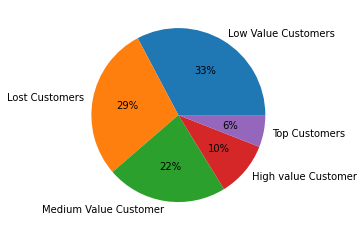

In [ ]:
plt.pie(rfm_df.customer_segment.value_counts(),
        labels=rfm_df.customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
df_new = pd.merge(df, rfm_df, how='inner', on='customer_id')

In [ ]:
df_new.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_group', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'recency',
       'frequency', 'monetary', 'R_rank', 'F_rank', 'M_rank', 'RFM_Score',
       'customer_segment'],
      dtype='object')

<AxesSubplot: xlabel='gender', ylabel='count'>

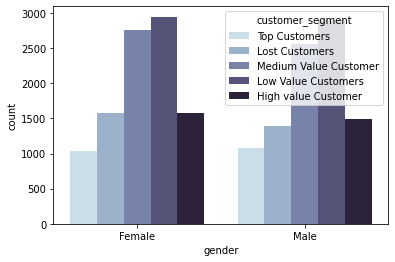

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_new, x='gender', hue='customer_segment', palette='ch:s=.25,rot=-.25')

<AxesSubplot: xlabel='count', ylabel='job_industry_category'>

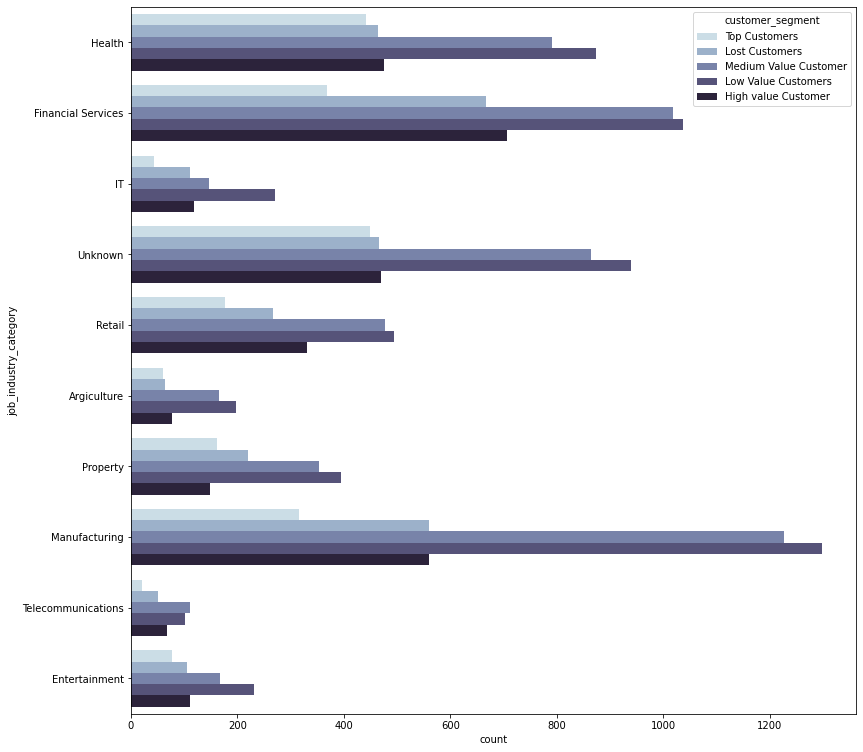

In [ ]:
plt.figure(figsize=(13,13))
sns.countplot(data=df_new, y='job_industry_category', hue='customer_segment', palette='ch:s=.25,rot=-.25')

<AxesSubplot: xlabel='wealth_segment', ylabel='count'>

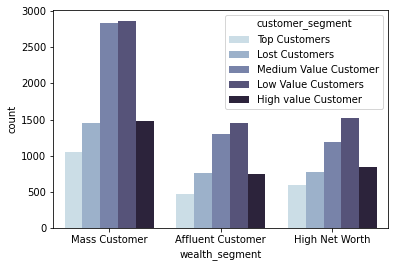

In [ ]:
sns.countplot(data=df_new, x='wealth_segment', hue='customer_segment', palette='ch:s=.25,rot=-.25')

<AxesSubplot: xlabel='owns_car', ylabel='count'>

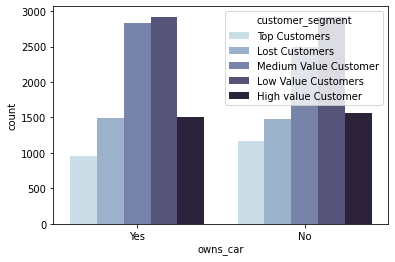

In [ ]:
sns.countplot(data=df_new, x='owns_car', hue='customer_segment', palette='ch:s=.25,rot=-.25')

<AxesSubplot: xlabel='age_group', ylabel='count'>

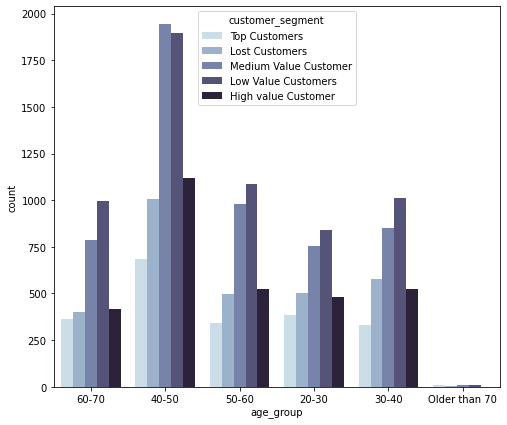

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(data=df_new, x='age_group', hue='customer_segment', palette='ch:s=.25,rot=-.25')

<AxesSubplot: xlabel='state', ylabel='count'>

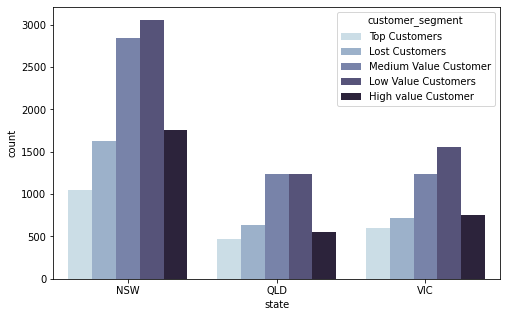

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_new, x='state', hue='customer_segment', palette='ch:s=.25,rot=-.25')